In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import imageio

In [2]:
def sir_model(N, beta, r, steps, dt = 1):
    S0 = N - 1
    I0 = 1
    R0 = 0
    S, I, R = [S0], [I0], [R0]
    for i in range(int(steps/dt) - 1):
        S.append(S[i] - (beta*S[i]*I[i]/N)*dt)
        I.append(I[i] + (beta*S[i]*I[i]/N - r*I[i])*dt)
        R.append(R[i] + (r*I[i])*dt)
    return S, I, R

I took population of 10000 people.

In [3]:
N = 10000

Firstly I took $\beta N = 0.5$ and $r = 0.2$ so that $\frac{\beta N}{r} > 1$

In [4]:
beta = 0.5
r = 0.2
X = sir_model(N, beta, r, 100)

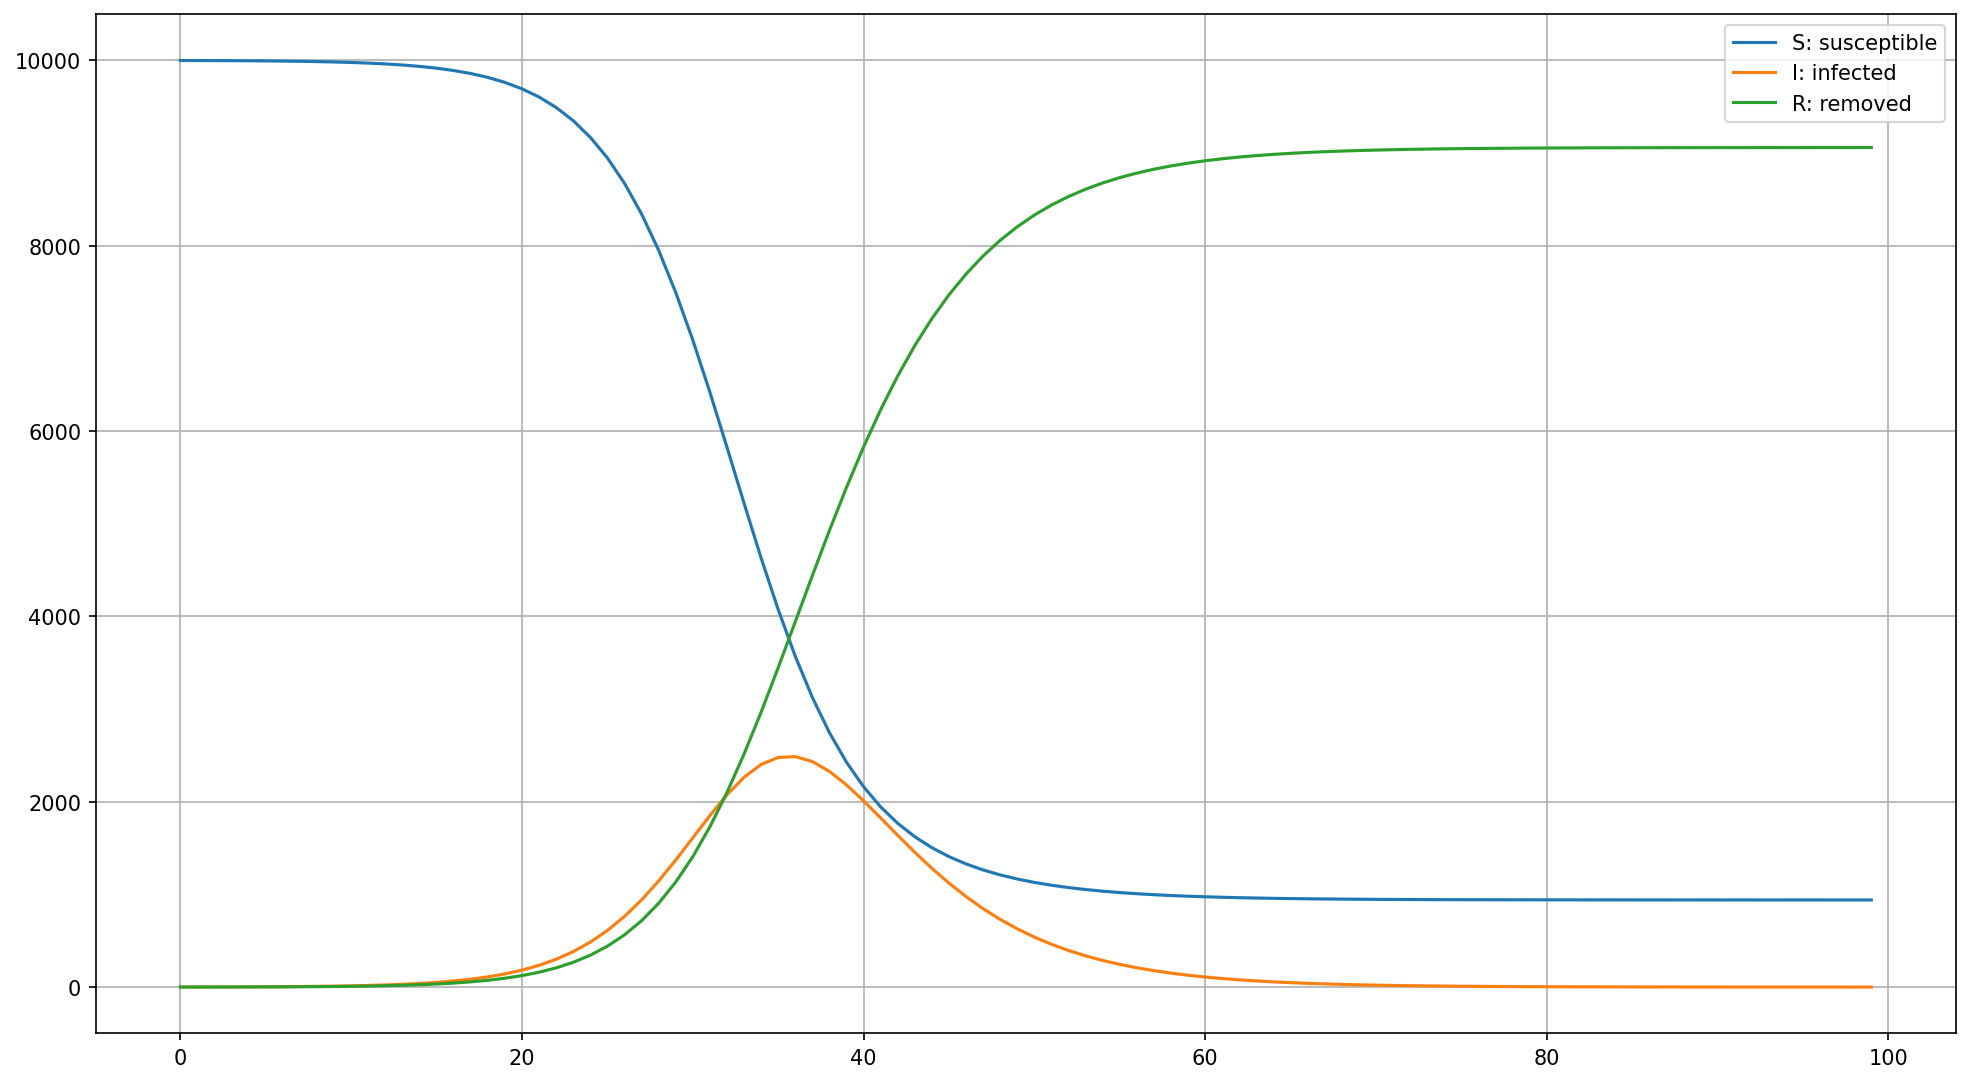

In [5]:
plt.figure(figsize = (16, 9), dpi = 150)
plt.grid()
plt.plot(X[0])
plt.plot(X[1])
plt.plot(X[2])
plt.legend(["S: susceptible", "I: infected", "R: removed"])
plt.show()

As we can se there was an epidemic. Now I will take $\beta N = 0.1$ and $r = 0.2$ so that $\frac{\beta N}{r} <1 $

In [6]:
beta = 0.1
r = 0.2
X1 = sir_model(N, beta, r, 100)

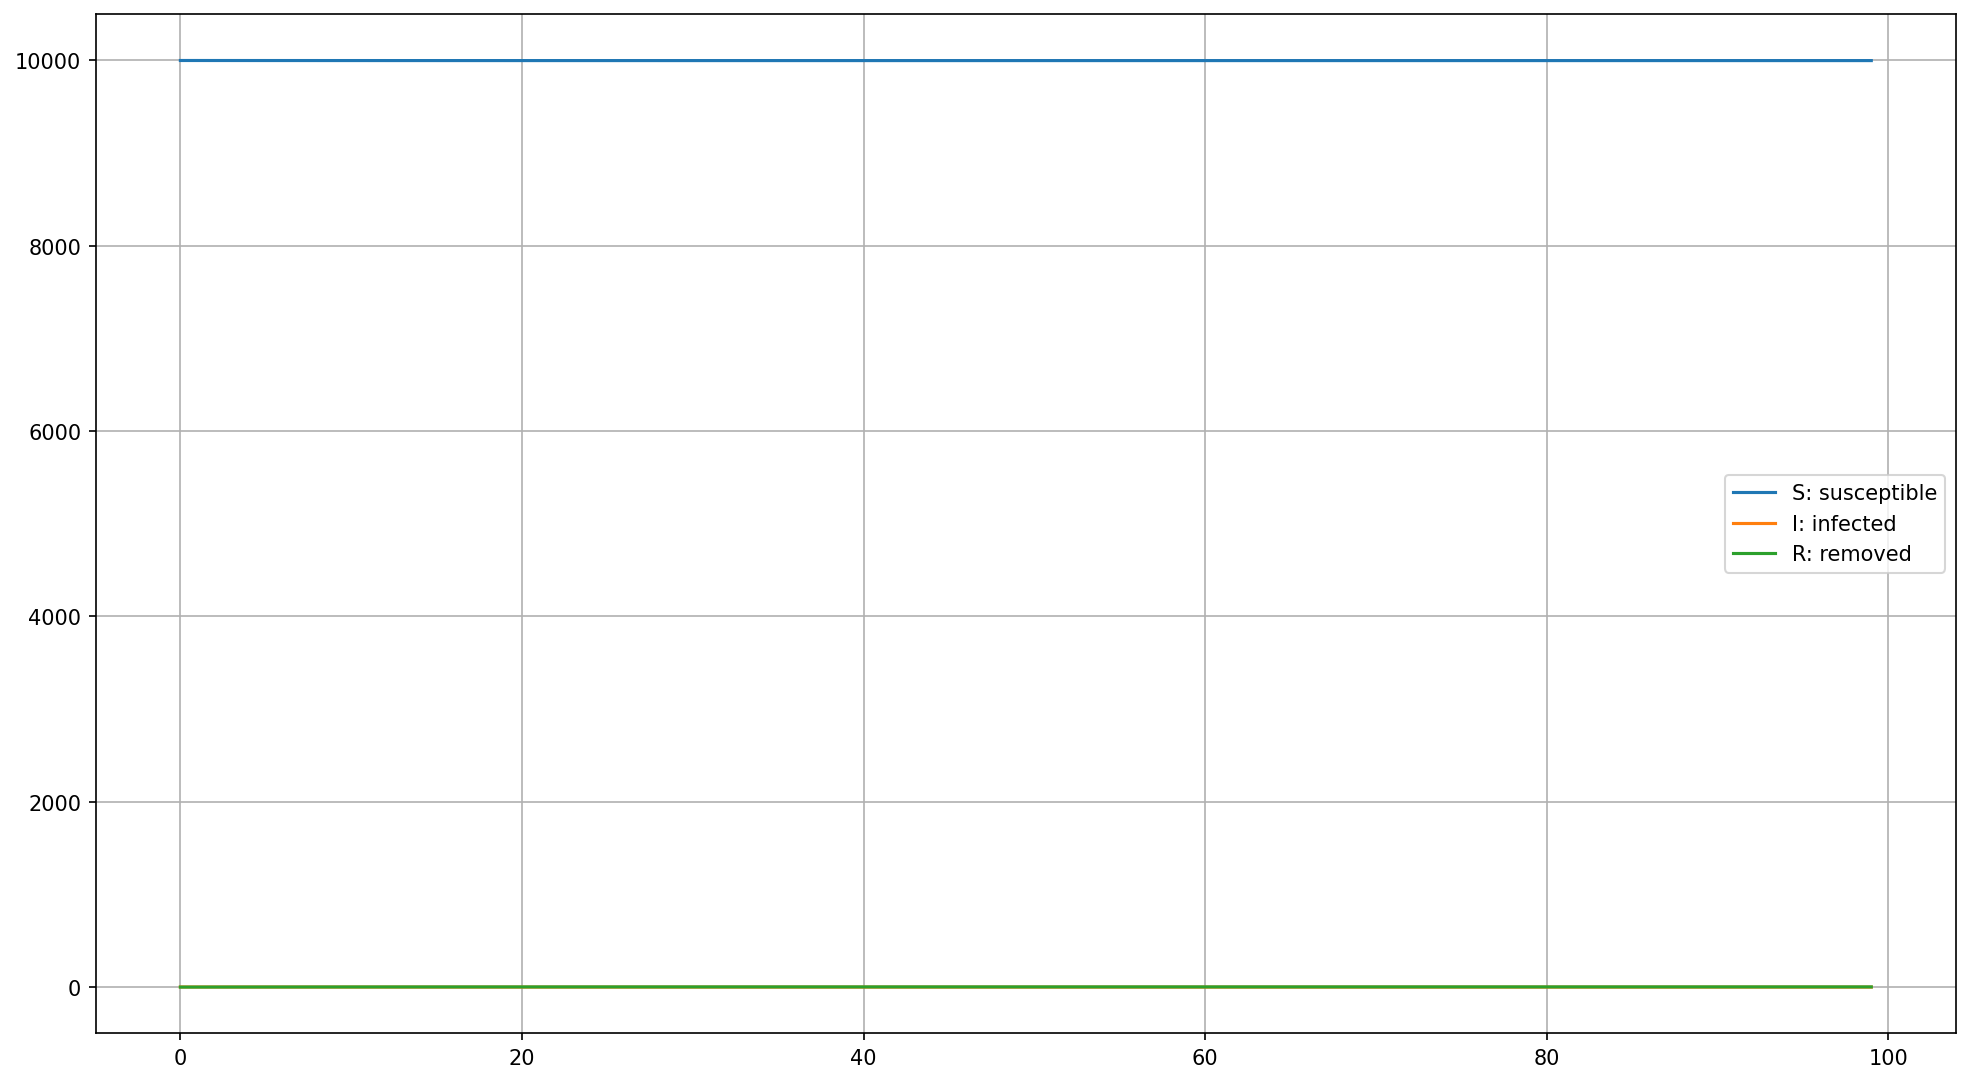

In [7]:
plt.figure(figsize = (16, 9), dpi = 150)
plt.grid()
plt.plot(X1[0])
plt.plot(X1[1])
plt.plot(X1[2])
plt.legend(["S: susceptible", "I: infected", "R: removed"])
plt.show()

As we can see there is no epidemic. We can also see how will look like plot of infected in time

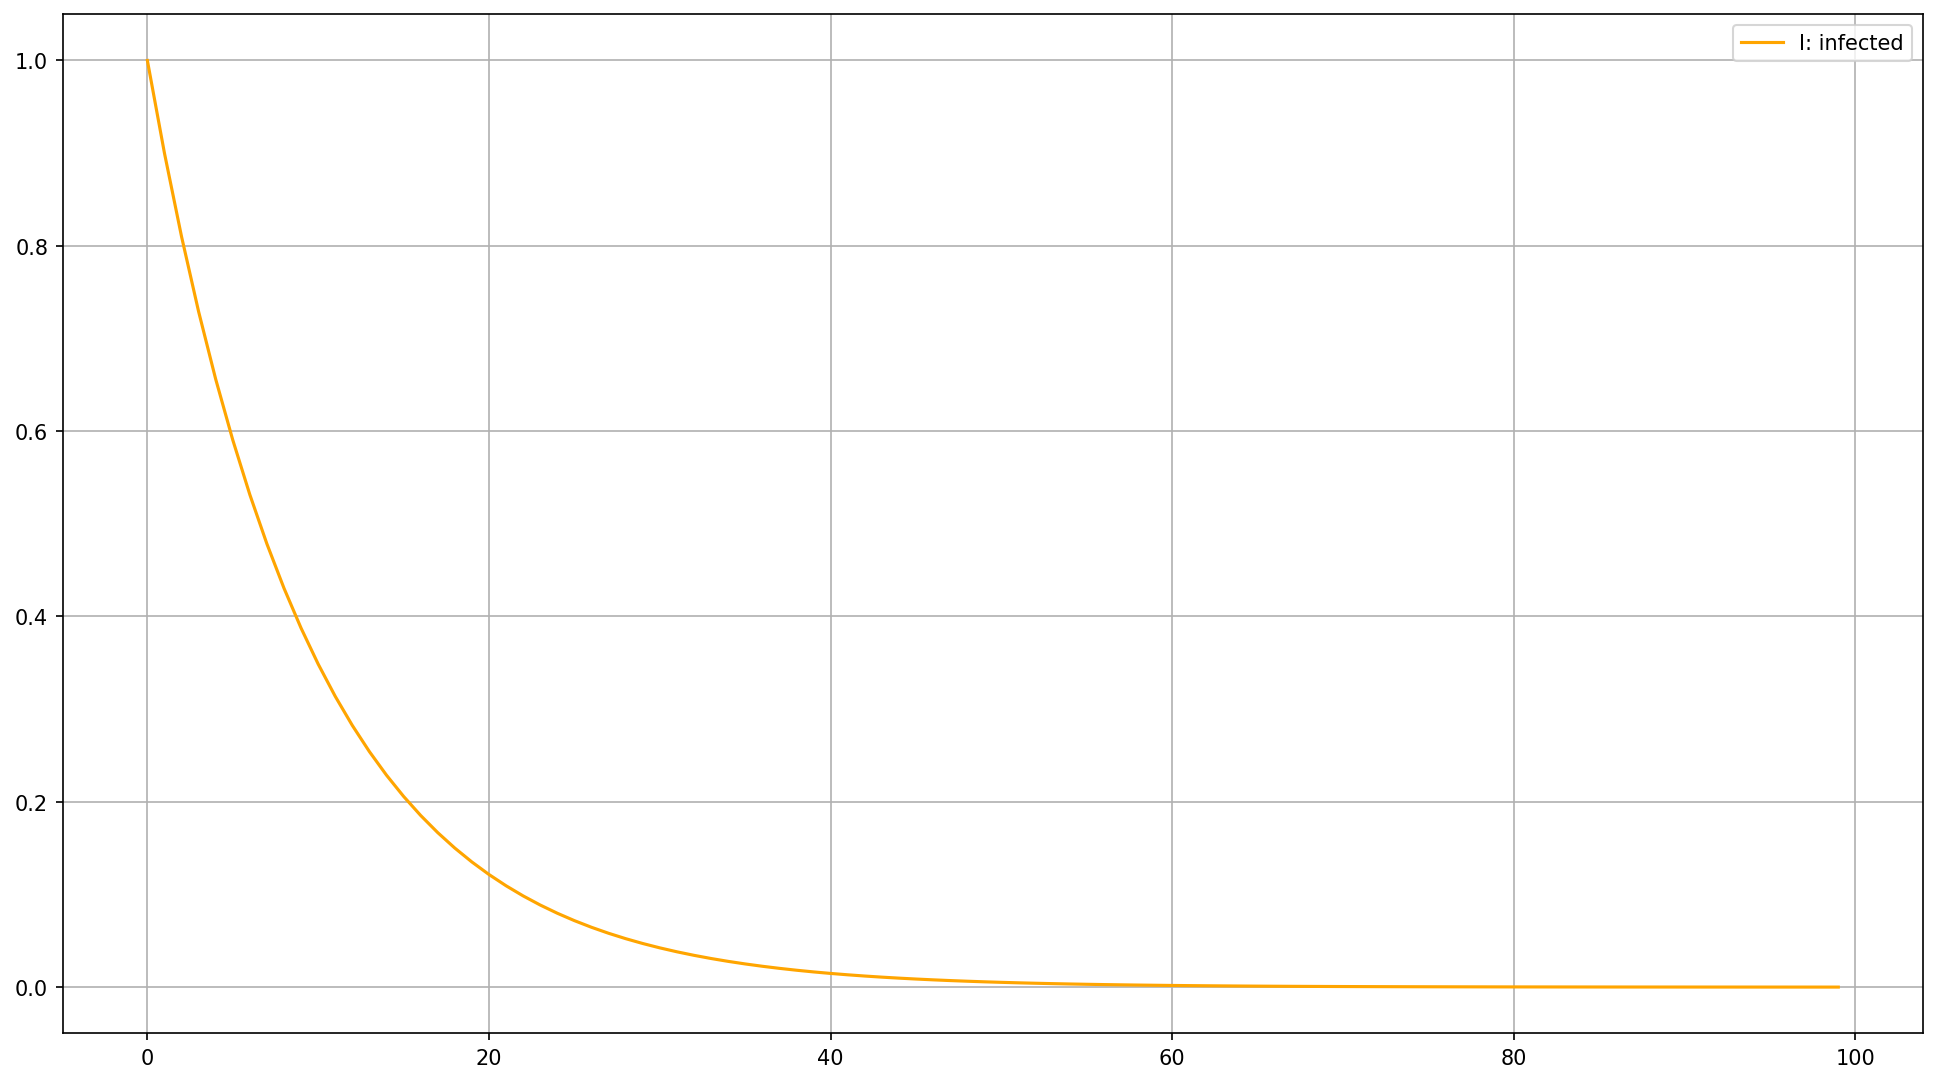

In [8]:
plt.figure(figsize = (16, 9), dpi = 150)
plt.grid()
plt.plot(X1[1], color = "orange")
plt.legend(["I: infected"])
plt.show()

Let us see what happens when $R_0$ is close to $1$. This time I took $\beta = 0.5$ and $r = 0.45$

In [9]:
beta = 0.5
r = 0.45
X2 = sir_model(N, beta, r, 300)

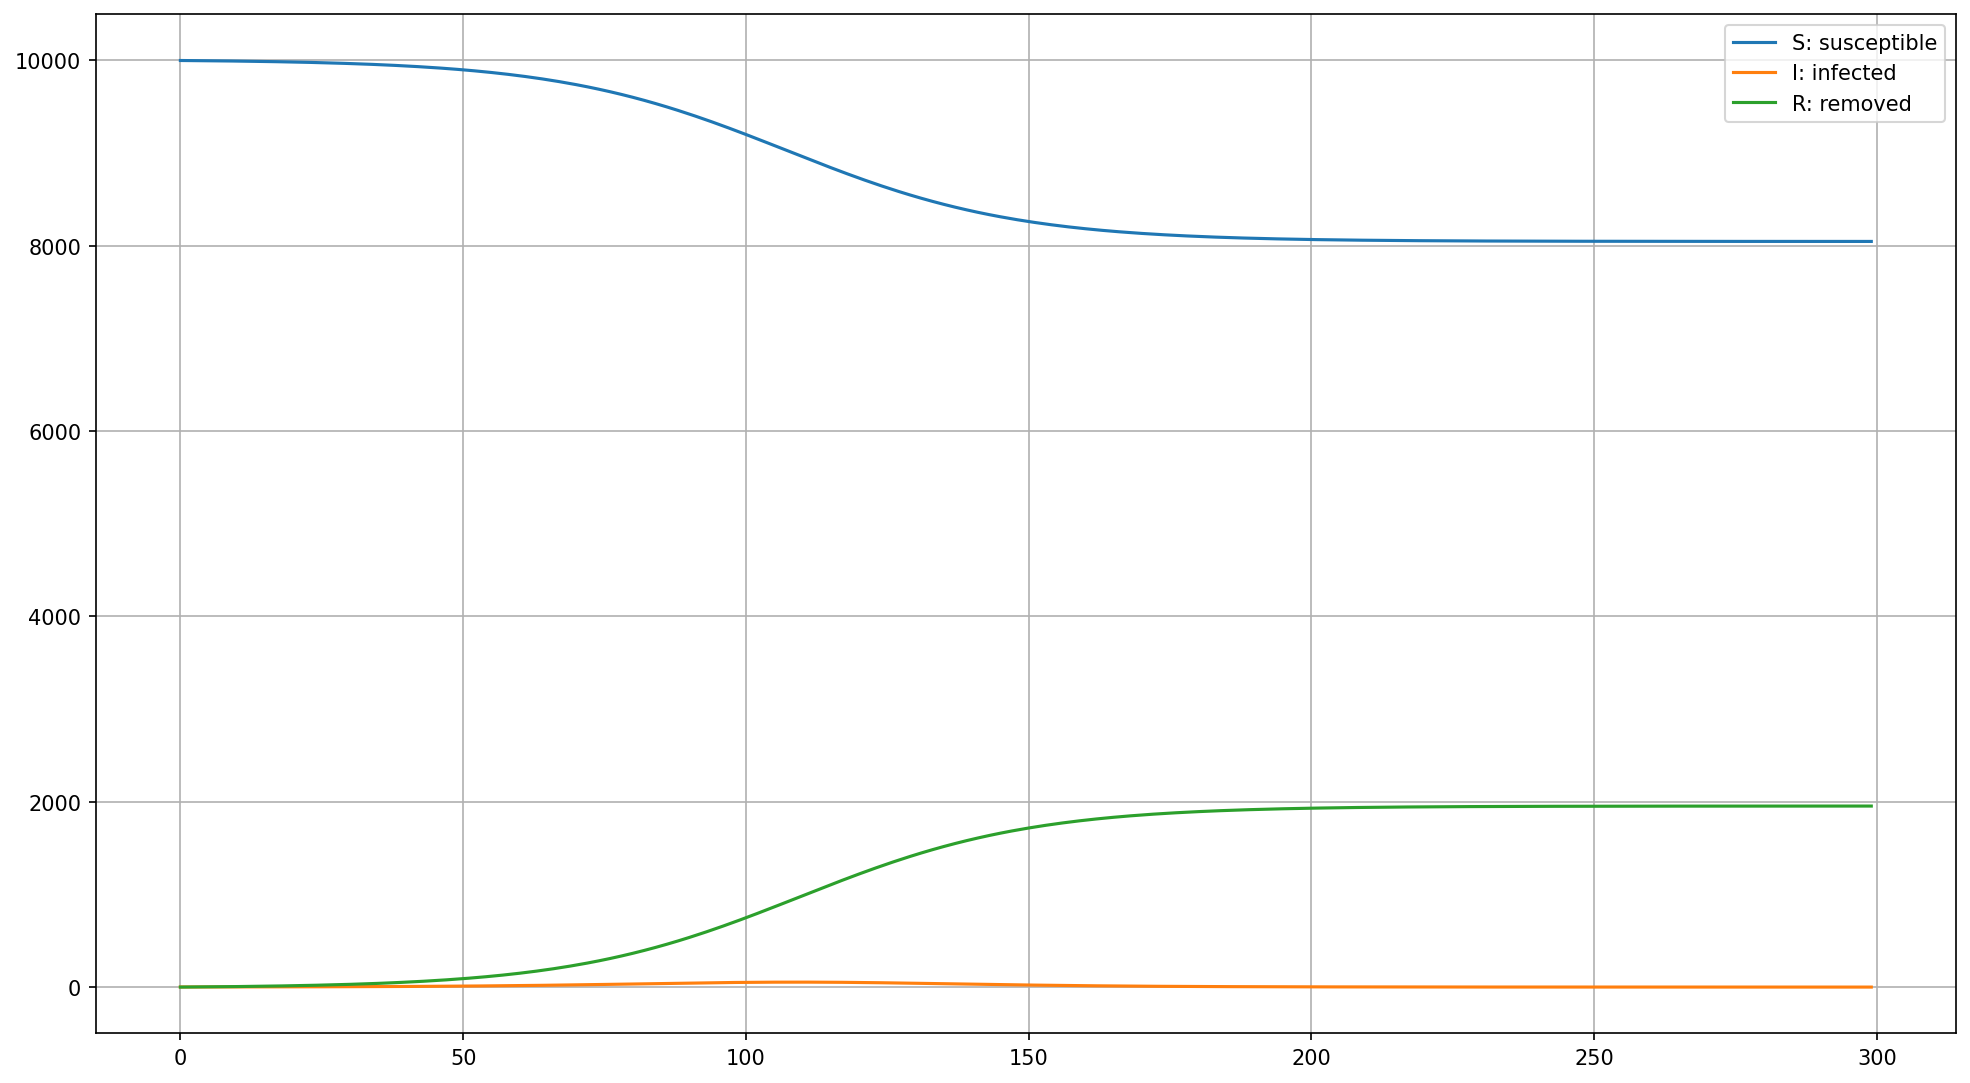

In [10]:
plt.figure(figsize = (16, 9), dpi = 150)
plt.grid()
plt.plot(X2[0])
plt.plot(X2[1])
plt.plot(X2[2])
plt.legend(["S: susceptible", "I: infected", "R: removed"])
plt.show()

As we can see, there was epidemic but small one.

In [11]:
def si_model(N, beta, r, steps, dt = 1):
    S0 = N - 1
    I0 = 1
    S, I = [S0], [I0]
    for i in range(int(steps/dt) - 1):
        S.append(S[i] - (beta*S[i]*I[i]/N)*dt)
        I.append(I[i] + (beta*S[i]*I[i]/N - r*I[i])*dt)
    return S, I

In [17]:
def make_pngs(N, beta, r, steps, folder_name, gif_name, dt = 1):
    if os.path.exists(folder_name):
        shutil.rmtree(folder_name)
    os.makedirs(folder_name)
    if type(beta) == list:
        for i in range(len(beta)):
            X = sir_model(N, beta[i], r, steps, dt = 1)
            plt.figure(figsize = (16, 9), dpi = 150)
            plt.plot(X[0])
            plt.plot(X[1])
            plt.plot(X[2])
            plt.legend(["S: susceptible", "I: infected", "R: removed"])
            plt.title(f"SIR model for diffrfent beta and r = {r}")
            plt.savefig(f'{folder_name}/img_{i}.png', 
                        transparent = False,  
                        facecolor = 'white')
            plt.close()
    if type(r) == list:
        for i in range(len(r)):
            X = sir_model(N, beta, r[i], steps, dt = 1)
            plt.figure(figsize = (16, 9), dpi = 150)
            plt.plot(X[0])
            plt.plot(X[1])
            plt.plot(X[2])
            plt.legend(["S: susceptible", "I: infected", "R: removed"])
            plt.title(f"SIR model for diffrfent beta and r = {r}")
            plt.savefig(f'{folder_name}/img_{i}.png', 
                        transparent = False,  
                        facecolor = 'white')
            plt.close()

In [18]:
def make_gif(N, beta, r, steps, folder_name, gif_name, dt = 1):
    make_pngs(N, beta, r, steps, folder_name, gif_name, dt = 1)
    sorted_files = sorted(os.listdir(folder_name), key=lambda x: int(x.split('_')[1].split('.')[0]) if '_' in x else -1)
    images = []
    for filename in sorted_files:
        if filename.endswith('.png'):  
            filepath = os.path.join(folder_name, filename)
            image = imageio.v2.imread(filepath)
            images.append(image)
    imageio.mimsave(gif_name, images, format='gif', duration=0.01)

In [20]:
make_gif(N, list(np.linspace(0, 1, 100)), 0.5, 100, 'first', 'first1.gif')